In [1]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [205]:
import sqlite3
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


import re
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ipreoteasa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ipreoteasa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ipreoteasa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [207]:
reviews = pd.read_csv('Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [208]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


What patterns do each of the 3 regex tokenizers below capture?

    1.
    2.
    3.

In [290]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+') 
# tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# tokenizer = RegexpTokenizer(r'\b\w{3,}\b')


What are we doing below? What's the purpose of plotting these values and what must we do with our data as a result of this plot?

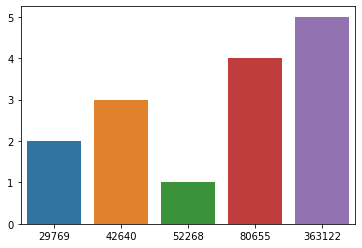

In [76]:
sns.barplot(y = reviews.Score.value_counts().index, x = reviews.Score.value_counts().values)

In [209]:
import imblearn.under_sampling as usample

In [211]:
undersampler = usample.RandomUnderSampler()

In [217]:
features_balanced, scores_balanced = undersampler.fit_sample(reviews.drop(columns=['Score']), reviews['Score'])
reviews_balanced = pd.concat([features_balanced, scores_balanced], axis=1)

In [219]:
reviews_balanced.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,317066,B000KRUEO0,A6HJRWK8DNLGP,L. C. Sterling,0,0,1350518400,Wish I'd realized it has garlic powder ...,I should have read the ingredients more carefu...,1
1,294265,B0085MLY5A,A2R53RXDSR24RG,hounddog,4,5,1319932800,Tastes Rotten,I have gone through 3 cases of this stuff. Th...,1
2,409185,B001O4FPDI,A3JM26BVON2BQ0,Sharon,2,2,1311811200,UTZ-Pub Mix,"This item is normally delicious...However, the...",1
3,442693,B001EQ4HIA,ARZF3TT7K5CD1,K. Niemi,2,2,1285632000,Rip off price of over $2.50 a gallon,Do the math and this comes out at over $2.50 a...,1
4,297004,B00395DVQS,A1IH42TUIZ2XJL,G. K. Libbey,1,2,1275696000,Strange Aftertaste-not at all like Creme Brulee,I have enjoyed creme brulee on many occasions ...,1


In [223]:
reviews_balanced.Score.value_counts()

5    29769
4    29769
3    29769
2    29769
1    29769
Name: Score, dtype: int64

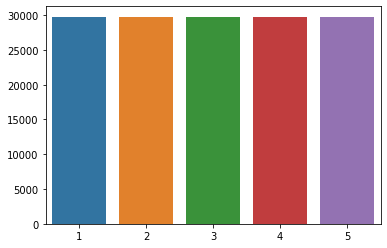

In [224]:
sns.barplot(x = reviews_balanced.Score.value_counts().index, 
            y = reviews_balanced.Score.value_counts().values)

In [291]:
reviews_model.Score.value_counts()

4    2024
1    2014
2    2007
3    1994
5    1961
Name: Score, dtype: int64

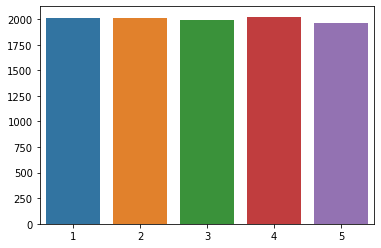

In [229]:
reviews_model = reviews_balanced.sample(n=10000)
sns.barplot(x = reviews_model.Score.value_counts().index, 
            y = reviews_model.Score.value_counts().values)

In [122]:
sample_reviews = reviews.sample(n=100)

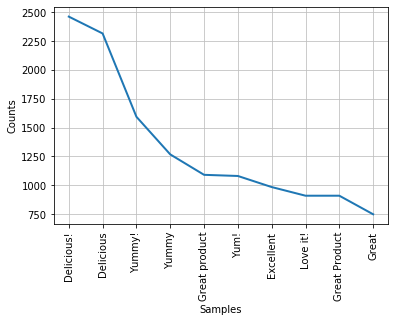

In [71]:
FreqDist(reviews.Summary.values.tolist()).plot(10)


In [112]:
sample_reviews.Text.to_list()

["I love all of the Blue Diamond Almond flavors and they are my favorite snack. This one is one of my favorite flavors and I eat these almonds for a snack because I view them as being healthier than other types of snack foods. This flavor is ideal as you get the freshness of perfectly roasted almonds with just a little dose of salt.<br /><br />One serving of these nuts is 170 Calories and it contains 6 grams of protein, 5 grams of carbohydrates, 3 grams of fiber and only 1 gram of sugar and 1 gram of saturated fat. You also get calcium, vitamin E and magnesium from the almonds which are good for your body, heart and bones. I would rather eat 28 of these almonds for 170 calories than 11 potato chips for the same calories and none of the dietary benefits.<br /><br />This flavor has only 2% of your daily intake of sodium which is good for any snack food.<br /><br />The only problem with these almonds is that they taste so good you have to be able to close the can and walk away. If you don

In [ ]:
len

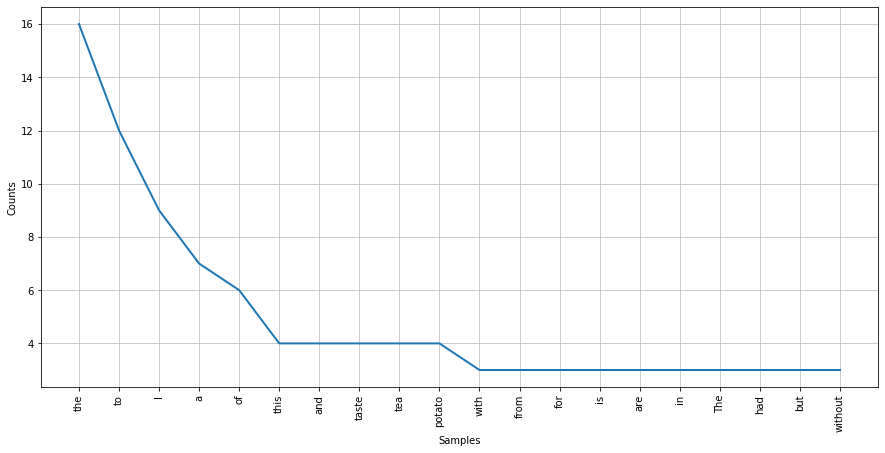

In [300]:
### You'll notice that this code seems a bit circuituous but it's caused by the fact that 
### nltk expects our corpus to be a list of separate strings, rather than the objects 
### that pandas series contains


flat_list_reviews=[]
tokenized_reviews = tokenizer.tokenize(str(reviews_model.Text.values))

for review in tokenized_reviews:
    flat_list_reviews.append(review)
        
        
# print(flat_list_reviews)       
plt.figure(figsize=(15,7))
FreqDist(flat_list_reviews).plot(20)



In [1]:
len(flat_list_reviews)

NameError: name 'flat_list_reviews' is not defined

In [302]:
stemmer = PorterStemmer()

lemmy = WordNetLemmatizer()

In [303]:
def apply_stem(doc):
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
    return stem_doc

def apply_lem(doc):
    doc_split = doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='n') + ' '
        
    return lem_doc
    

In [195]:
sample_reviews['Text_stemmed'] = sample_reviews.Text.apply(apply_stem)
sample_reviews['Text_lemmed'] = sample_reviews.Text.apply(apply_lem)

In [196]:
print("ORIGINAL: ", sample_reviews.Text.iloc[4])
print("STEMMED: ", sample_reviews.Text_stemmed.iloc[4])
print("LEMMED: ", sample_reviews.Text_lemmed.iloc[4])

ORIGINAL:  I have tried numerous dry cat foods, but the one my cats like best is the Goodlife Recipe! Not sure if it's the yummy aroma, or just the sound of it being poured into their bowls, but they sure come running!  I feed our cats canned food, but always have a bowl of dry food available. Some of our cats prefer dry food, and this recipe is a winner! I like the fact that it's high in protein and has fiber and veggies too.<br />Try it- you won't be disappointed!!<br />Pricing on Amazon is great, the automatic delivery is a godsend- and free delivery is a winner!
STEMMED:  I have tri numer dri cat foods, but the one my cat like best is the goodlif recipe! not sure if it' the yummi aroma, or just the sound of it be pour into their bowls, but they sure come running!  I feed our cat can food, but alway have a bowl of dri food available. some of our cat prefer dri food, and thi recip is a winner! I like the fact that it' high in protein and ha fiber and veggi too.<br />tri it- you won't

In [199]:
sample_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_stemmed,Text_lemmed
480304,480305,B000DZDJ0K,A2IP8PLL8JORVD,Palyne Gaenir,1,1,5,1267833600,Very versatile stuff!,My new perfect-world 'wish list item' is a 'co...,My new perfect-world 'wish list item' is a 'co...,My new perfect-world 'wish list item' is a 'co...
288225,288226,B000ENUC3S,A1PFK5LXIAWGPJ,Longtime Amazon Customer,1,1,5,1251763200,Best Bars I've Found,"I've tried many bars over the years, from snac...","i'v tri mani bar over the years, from snack ba...","I've tried many bar over the years, from snack..."
197884,197885,B0078Y6CN0,A1MEVBD79PNUI7,Molly A. Wall,1,1,5,1290729600,Great aroma and taste,"Great flavor, and the aroma is fantastic. If y...","great flavor, and the aroma is fantastic. If y...","Great flavor, and the aroma is fantastic. If y..."
280631,280632,B000E4ALF6,A29AUV3YNTUIL8,M. Ciofani,0,0,5,1313625600,Yummy crunchy goodness,By far my favorite morning cereal; why else wo...,By far my favorit morn cereal; whi els would y...,By far my favorite morning cereal; why else wo...
161843,161844,B0029O0VUE,A1HZGQ44DFK6T0,Lovely Mt. View,0,0,5,1347753600,Best Dry Food!,"I have tried numerous dry cat foods, but the o...","I have tri numer dri cat foods, but the one my...","I have tried numerous dry cat foods, but the o..."


In [230]:
reviews_model['Text_stemmed'] = reviews_model.Text.apply(apply_stem)
reviews_model['Text_lemmed'] = reviews_model.Text.apply(apply_lem)

In [231]:
x_train, x_test, y_train, y_test = train_test_split(reviews_model.drop(columns=['Score']), 
                                                    reviews_model['Score'], test_size=.2, random_state=42)

In [304]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'and', 'again', 'hers', 'down', 'them', 'same', 'an', 'just', "you'd", 'did', 'below', 'itself', 'were', 'between', "hasn't", 'own', 'how', 'then', 'hasn', 'him', 'am', 'so', 'won', 'from', "don't", 'my', 'to', 'yourselves', 'does', 'mightn', 'y', "couldn't", "aren't", 'a', 'been', 'nor', 's', "doesn't", 'needn', 'doesn', 'if', 'being', "that'll", 'having', 'any', 'o', 'both', 'haven', 'there', 'your', 'over', 'm', "isn't", 'weren', 'further', 'with', 'out', 'their', 'too', "mustn't", 'or', 'll', 'in', 'why', 'such', 'they', 'as', 'he', 'can', 'our', 'more', "wouldn't", "you've", 'about', 'on', 'through', 'where', 'i', 'have', 'off', 'here', 'before', 'we', 'each', 'few', 'above', 've', 'of', "mightn't", 'most', "it's", 'yourself', "you'll", 'couldn', 'it', 'the', 'other', "hadn't", 'will', 'by', 'yours', 'is', 'very', 'be', 'until', 'these', 'what', 'themselves', 'doing', 'd', 'those', 'wasn', 'ma', 'after', 'under', 'his', "shan't", "weren't", 'while', 'all', 'didn', 'no', 'hadn', "

In [305]:
# and ofc we can add our own particulars to this set before we pass it into the vectorizer

In [321]:
len(reviews_model)

10000

In [341]:
tf_idf_vect = TfidfVectorizer(lowercase=True, tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, ngram_range=(1,2),
                              min_df = 0.01,
                              max_df = 0.9)



In [342]:
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train.Text_lemmed)

In [343]:
x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test.Text_lemmed)

In [344]:
# converting back into a pd dataframe
x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,1,1 2,10,100,12,15,16,2,20,24,...,would like,would recommend,wrong,www,www amazon,year,year old,years,yes,yet
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.071369,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.127415,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
for i, col in enumerate(x_lemm_train_tfidf.columns):
    print(i, col)

0 1
1 1 2
2 10
3 100
4 12
5 15
6 16
7 2
8 20
9 24
10 25
11 3
12 30
13 4
14 5
15 5 star
16 50
17 6
18 7
19 8
20 9
21 able
22 absolutely
23 acid
24 actual
25 actually
26 add
27 added
28 adding
29 aftertaste
30 ago
31 agree
32 almond
33 almost
34 along
35 already
36 also
37 alternative
38 although
39 always
40 amazing
41 amazon
42 amazon com
43 amount
44 another
45 anymore
46 anyone
47 anything
48 anyway
49 apple
50 aroma
51 around
52 arrived
53 artificial
54 ate
55 available
56 avoid
57 away
58 awful
59 baby
60 back
61 bad
62 bag
63 bags
64 bar
65 bars
66 based
67 batch
68 bean
69 become
70 beef
71 believe
72 benefit
73 best
74 better
75 big
76 bit
77 bite
78 bitter
79 black
80 bland
81 blend
82 blue
83 body
84 bold
85 bottle
86 bottom
87 bought
88 bowl
89 box
90 br
91 br also
92 br br
93 brand
94 brands
95 bread
96 break
97 breakfast
98 brew
99 brewed
100 brewing
101 broken
102 brown
103 bulk
104 butter
105 buy
106 buying
107 caffeine
108 call
109 called
110 calorie
111 calories
112 cam

Ok, so looking at the features that have come out: what changes would you make to your preprocessing and vectorisation steps?

In [348]:
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')

tf_idf_vect = TfidfVectorizer(lowercase=True, tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, ngram_range=(1,2),
                             min_df = 0.05,
                             max_df = 0.9)

x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train.Text_lemmed)

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test.Text_lemmed)

# converting back into a pd dataframe
x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()


,also,amazon,back,bad,bag,best,better,bit,bought,box,...,use,used,want,water,way,well,without,work,would,year
0,0.0,0.141261,0.0,0.0,0.0,0.16435,0.000000,0.161905,0.0,0.0,...,0.0,0.0,0.0,0.0,0.157429,0.150217,0.0,0.0,0.116014,0.0
1,0.0,0.510416,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.180926,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.182587,0.203071,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.345317,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [349]:
# Ok so now let's look at modelling!

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [352]:
y_train.shape

(8000,)

In [361]:
dec_tree = DecisionTreeClassifier(random_state=42)

tree_param = [{'max_depth':[5,10,15,20, 25, 30]},
             {'min_samples_leaf':[.05, .1, .15, .2]}]

grid = GridSearchCV(dec_tree,
                   param_grid=tree_param,
                   scoring='accuracy',
                   n_jobs=-1, 
                   cv=5)


best_tree = grid.fit(x_lemm_train_tfidf, y_train).best_estimator_

best_tree.score(x_lemm_train_tfidf, y_train)

0.55325

In [372]:
feats = x_lemm_train_tfidf.columns
feats

Index(['also', 'amazon', 'back', 'bad', 'bag', 'best', 'better', 'bit',
       'bought', 'box',
       ...
       'use', 'used', 'want', 'water', 'way', 'well', 'without', 'work',
       'would', 'year'],
      dtype='object', length=109)

In [377]:
feat_imps = best_tree.feature_importances_


In [400]:
ordered_feat = pd.DataFrame({'features' : feats, 'importance': feat_imps})
ordered_feat

,features,importance
0,also,0.004838
1,amazon,0.005673
2,back,0.005717
3,bad,0.013192
4,bag,0.018835
...,...,...
104,well,0.012631
105,without,0.004329
106,work,0.005938
107,would,0.024476


In [403]:
ordered_feat.sort_values(by='importance', ascending=False, inplace=True)
ordered_feat

,features,importance
48,love,0.051694
38,great,0.048625
36,good,0.042505
44,like,0.037900
29,flavor,0.035828
...,...,...
70,review,0.001556
40,high,0.001311
72,said,0.001066
12,chocolate,0.000700


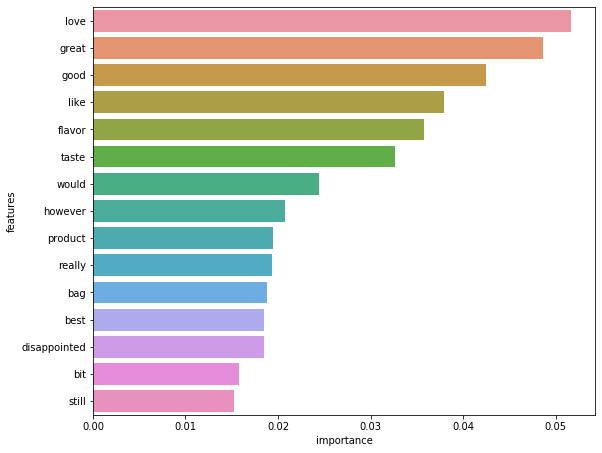

In [410]:
plt.figure(figsize=(9,7.5))
sns.barplot(x= ordered_feat.importance[:15], y= ordered_feat.features[:15])

Look at at the graph above: does it make sense to you? Is there anything that surprises you about it?

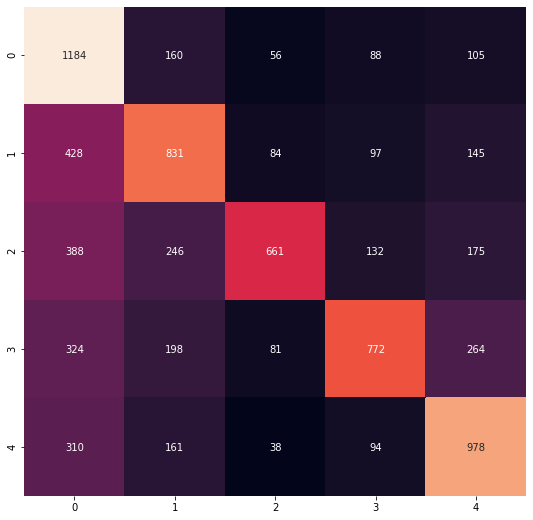

In [416]:
y_train_pred = best_tree.predict(x_lemm_train_tfidf)
plt.figure(figsize=(9,9))
sns.heatmap( confusion_matrix(y_train, y_train_pred), annot= True, fmt = '.4g', cbar=0)

Let's not forget that we had other input features as well! How are we gonna use them??

In [349]:
# Ok so now let's look at modelling!

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [418]:
x_train.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Text_stemmed,Text_lemmed
100138,332088,B0045XB4AI,A2XUMWYA9DH3HS,SoCalRay,0,0,1300233600,"Seemed to work in a mild, sustained way","Most energy drinks like Rockstar, Red Bull, an...","most energi drink like rockstar, red bull, and...","Most energy drink like Rockstar, Red Bull, and..."
126599,529699,B0032CB15Q,A3OXFX475MO5ZV,Catherine Raccuia,1,2,1309737600,"Green mountain coffee extra bold ,breakfast blend",I don!t have a Keurig coffee myself but i buy ...,I don!t have a keurig coffe myself but i buy g...,I don!t have a Keurig coffee myself but i buy ...
140951,12631,B0018Z5V7I,AVJJ2D4G5I0Z4,"Michael A. Behr ""mabehr""",7,8,1249257600,"Great for ""catkins"" diet",We started buying 100% meat diets on our vet's...,We start buy 100% meat diet on our vet' recomm...,We started buying 100% meat diet on our vet's ...
70405,49261,B004OA5ZDO,ASDYZF6BQ20GX,PamandJana,4,4,1325894400,Dog loved it but no detectable calming effect,"My dog thoroughly enjoyed the Bonies ""calming""...","My dog thoroughli enjoy the boni ""calming"" che...","My dog thoroughly enjoyed the Bonies ""calming""..."
24279,67194,B004JRXZKM,A2F48EVKXC1P9H,K Klimas,0,0,1349913600,DISGUSTING!!,Believe it when you read all the reviews that ...,believ it when you read all the review that sa...,Believe it when you read all the review that s...


In [420]:
x_train.drop(columns=['Id', 'ProductId', 'ProfileName'], inplace=True)

In [421]:
y_train.shape

(8000,)

In [427]:
x_train.Summary.fillna(value=' ', inplace=True)

In [428]:
x_train.Summary.isna().sum()

0

In [433]:
tokenizer_summary = RegexpTokenizer(r'[a-zA-Z0-9]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, tokenizer = tokenizer_summary.tokenize, 
                              stop_words=stop_words, ngram_range=(1,1),
                             min_df = 0.01,
#                              max_df = 0.9
                             )

x_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(x_train.Summary)

x_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(x_test.Summary)

# converting back into a pd dataframe
x_lemm_train_summary_tfidf = pd.DataFrame(x_lemm_train_summary_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect_summary.get_feature_names())

x_lemm_test_summary_tfidf = pd.DataFrame(x_lemm_test_summary_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect_summary.get_feature_names())


x_lemm_train_summary_tfidf.head()

,bad,best,better,buy,cat,coffee,delicious,dog,excellent,flavor,...,product,quality,really,sugar,sweet,taste,tastes,tasty,tea,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [436]:
x_lemm_summary_text = x_lemm_train_summary_tfidf.join(x_lemm_train_tfidf, lsuffix='_sum')
x_lemm_summary_text.head()

,bad_sum,best_sum,better_sum,buy_sum,cat,coffee_sum,delicious,dog_sum,excellent,flavor_sum,...,use,used,want,water,way,well,without,work,would,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.157429,0.150217,0.0,0.0,0.116014,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.180926,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.345317,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [444]:
x_lemm_summary_text.shape

(8000, 140)

In [445]:
x_train_nontext.shape

(8000,)

In [446]:
x_train_nontext = x_train['Time']

# x_lemm_full = pd.concat([x_train_nontext, x_lemm_summary_text], axis=1)
# x_lemm_full.shape

(15581, 141)

In [441]:
y_train.shape

(8000,)

In [447]:
dec_tree = DecisionTreeClassifier(random_state=42)

tree_param = [{'max_depth':[5,10,15,20, 25, 30]},
             {'min_samples_leaf':[.05, .1, .15, .2]}]

grid = GridSearchCV(dec_tree,
                   param_grid=tree_param,
                   scoring='accuracy',
                   n_jobs=-1, 
                   cv=5)


best_tree = grid.fit(x_lemm_summary_text, y_train).best_estimator_

best_tree.score(x_lemm_summary_text, y_train)

0.627625

In [448]:
feats = x_lemm_summary_text.columns
feats

Index(['bad_sum', 'best_sum', 'better_sum', 'buy_sum', 'cat', 'coffee_sum',
       'delicious', 'dog_sum', 'excellent', 'flavor_sum',
       ...
       'use', 'used', 'want', 'water', 'way', 'well', 'without', 'work',
       'would', 'year'],
      dtype='object', length=140)

In [449]:
feat_imps = best_tree.feature_importances_


In [450]:
ordered_feat = pd.DataFrame({'features' : feats, 'importance': feat_imps})
ordered_feat

,features,importance
0,bad_sum,0.003263
1,best_sum,0.019887
2,better_sum,0.001278
3,buy_sum,0.000000
4,cat,0.000000
...,...,...
135,well,0.015571
136,without,0.007848
137,work,0.003393
138,would,0.020281


In [451]:
ordered_feat.sort_values(by='importance', ascending=False, inplace=True)
ordered_feat

,features,importance
67,good,0.043058
69,great,0.036018
79,love,0.031415
118,taste,0.029526
11,good_sum,0.028940
...,...,...
16,much_sum,0.000000
20,price_sum,0.000000
24,sugar_sum,0.000000
25,sweet_sum,0.000000


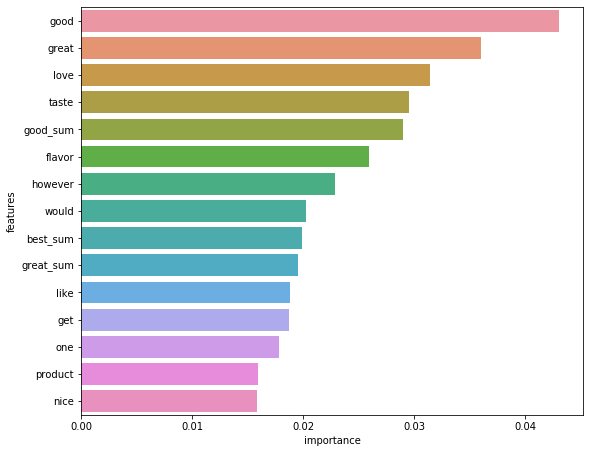

In [452]:
plt.figure(figsize=(9,7.5))
sns.barplot(x= ordered_feat.importance[:15], y= ordered_feat.features[:15])

Look at at the graph above: does it make sense to you? Is there anything that surprises you about it?

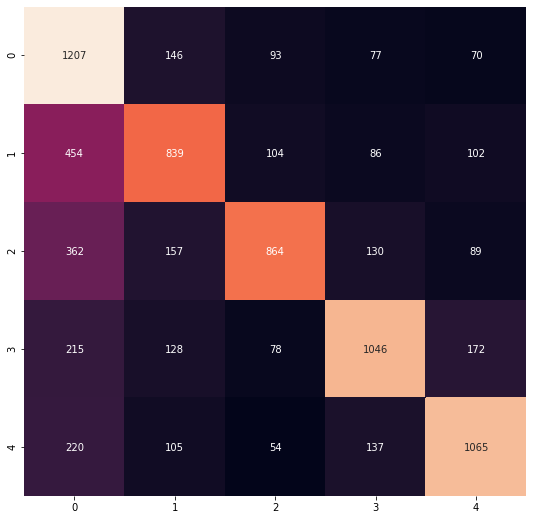

In [454]:
y_train_pred = best_tree.predict(x_lemm_summary_text)
plt.figure(figsize=(9,9))
sns.heatmap( confusion_matrix(y_train, y_train_pred), annot= True, fmt = '.4g', cbar=0)